In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

import seaborn as snr
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 18: unexpected end of data  type encoding
# load data
data=pd.read_csv('./terrorism_data.csv', encoding='latin-1')
data.head()
data.shape

(181691, 135)

In [5]:
# data cleaning
# finding missing values per column
(data.isnull().sum())/len(data)

eventid               0.000000
iyear                 0.000000
imonth                0.000000
iday                  0.000000
approxdate            0.949150
extended              0.000000
resolution            0.987781
country               0.000000
country_txt           0.000000
region                0.000000
region_txt            0.000000
provstate             0.002317
city                  0.002389
latitude              0.025076
longitude             0.025081
specificity           0.000033
vicinity              0.000000
location              0.694564
summary               0.363964
crit1                 0.000000
crit2                 0.000000
crit3                 0.000000
doubtterr             0.000006
alternative           0.840328
alternative_txt       0.840328
multiple              0.000006
success               0.000000
suicide               0.000000
attacktype1           0.000000
attacktype1_txt       0.000000
                        ...   
propextent            0.647396
propexte

 # Drop columns having missing value percentage more than 30%

In [6]:
newdata=pd.DataFrame()

for col in data:
    if (data[col].isnull().sum())/len(data)<.30:
        newdata[col]=data[col]
newdata.shape
newdata.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [7]:
#now lets drop records ith missing value

newdata1=newdata.dropna(how='any')
newdata1.shape

(106564, 48)

 # Year wise successful and not successful attacks

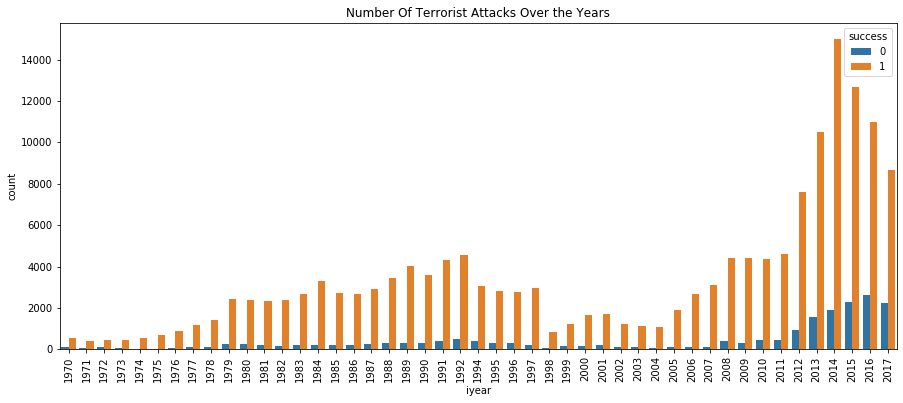

In [26]:
plt.subplots(figsize=(15,6))
snr.countplot(x='iyear', data=newdata, hue='success')
snr.xlabel = "Year"
snr.ylabel = "No. of terrorist activities"
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Over the Years')
plt.show()

Over the yeas number of terrosit attacjs are inctrased. From the above plot we can see, amount of terrosit attacks were decresed in years between 1998 and 2004, however after 2017 we can see the exponential growth in the number of successful attacks. 

# Different ways of terrorist attacks

Text(0.5, 1.0, 'Attacking Methods by Terrorists')

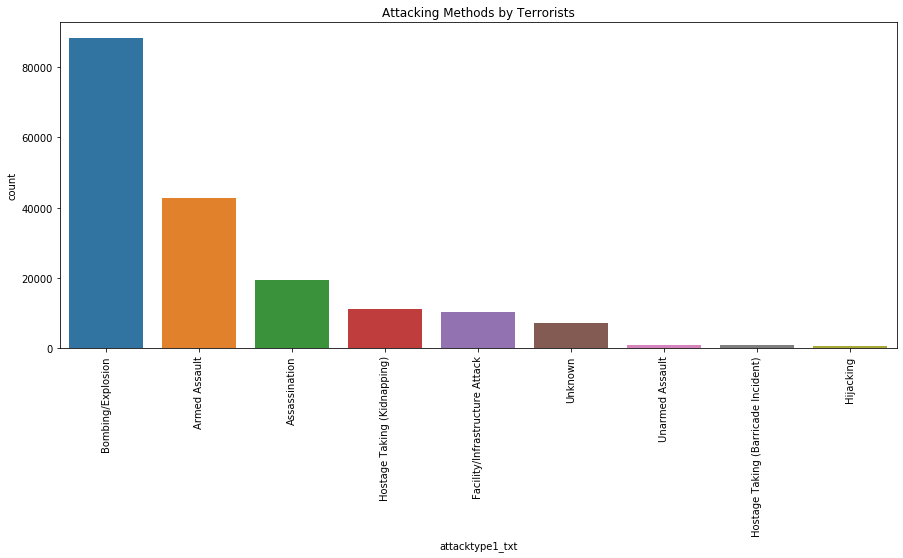

In [11]:
plt.subplots(figsize=(15,6))
snr.countplot(x='attacktype1_txt', data=newdata, order=newdata['attacktype1_txt'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')

Text(0.5, 1.0, 'Wepons used for Attacks')

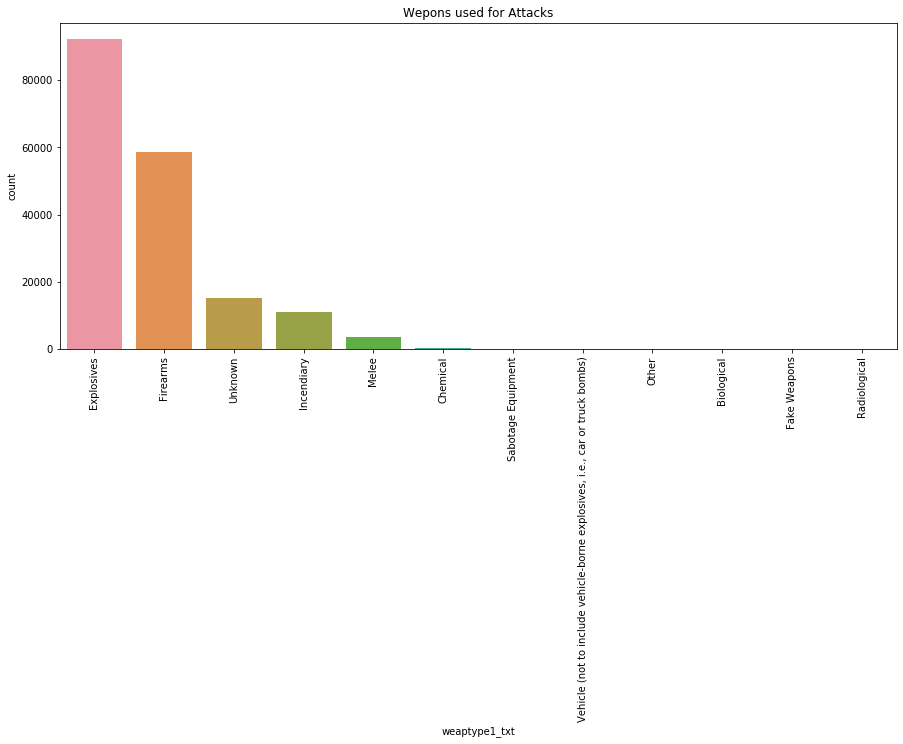

In [29]:
#Wepons type for attack
plt.subplots(figsize=(15,6))
snr.countplot(x='weaptype1_txt',data=newdata, order=newdata['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Wepons used for Attacks')

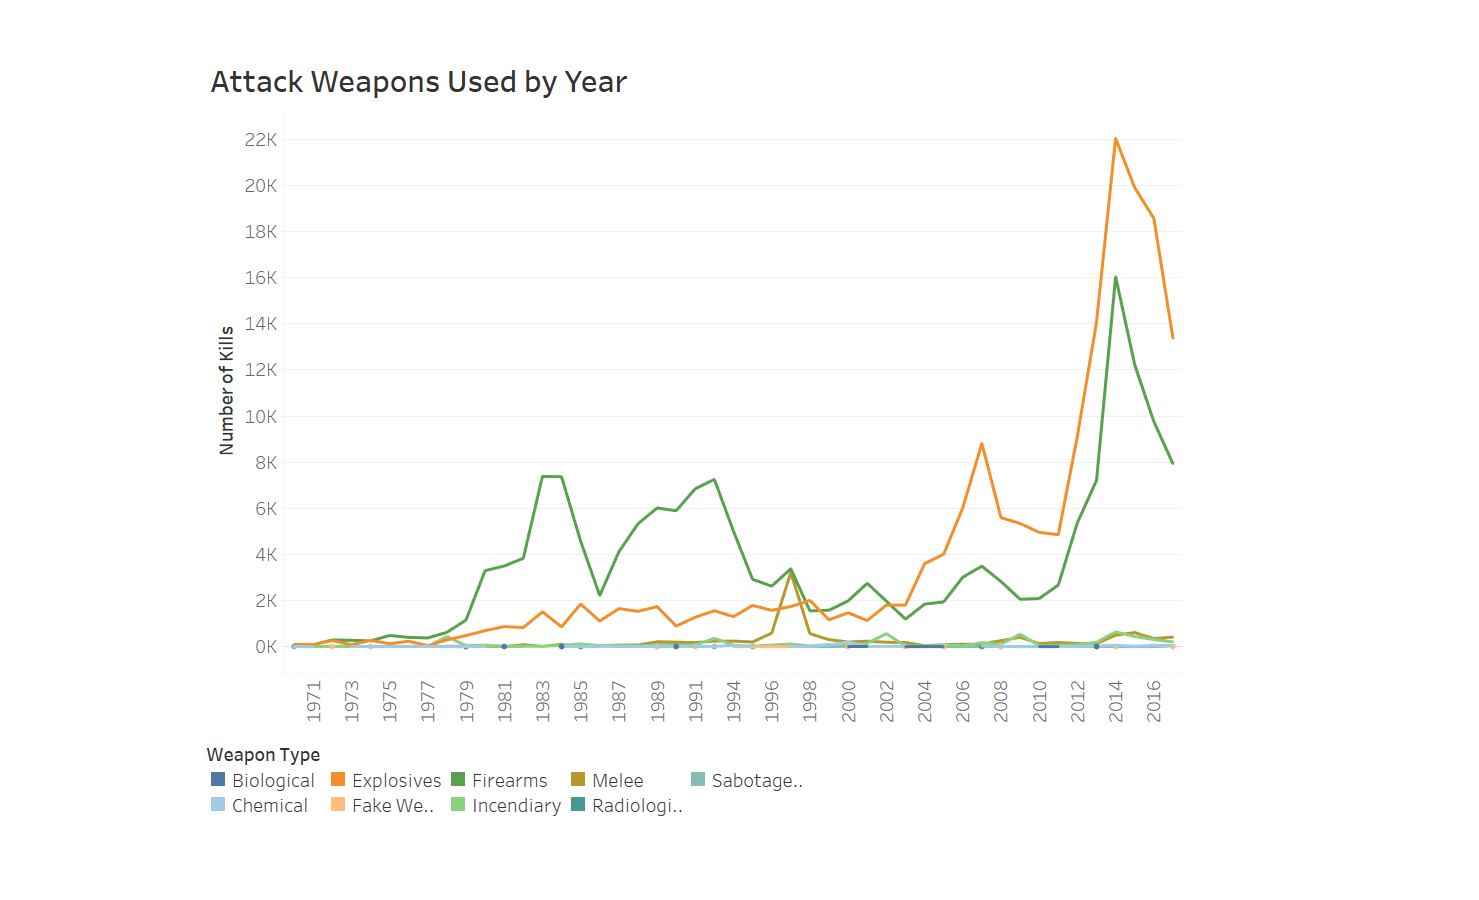

In [30]:
Image('./Yearwise Attack Weapon.png')

Explosives and Fire arms are the most frequently used weapon by the terrorist organizations. Over te years firearms is one of the most frequently used weapons, however we can see an exponential growth in the use of explosives after the 2000. This is mainly because area and impact of causility is high in the use of firearms and explosives and also most of the terrorist organization gain access to explosive mechanism during the early 2000's.

# Attack Targeted types
#data1,palette='coolwarm'

Text(0.5, 1.0, 'Common Targets')

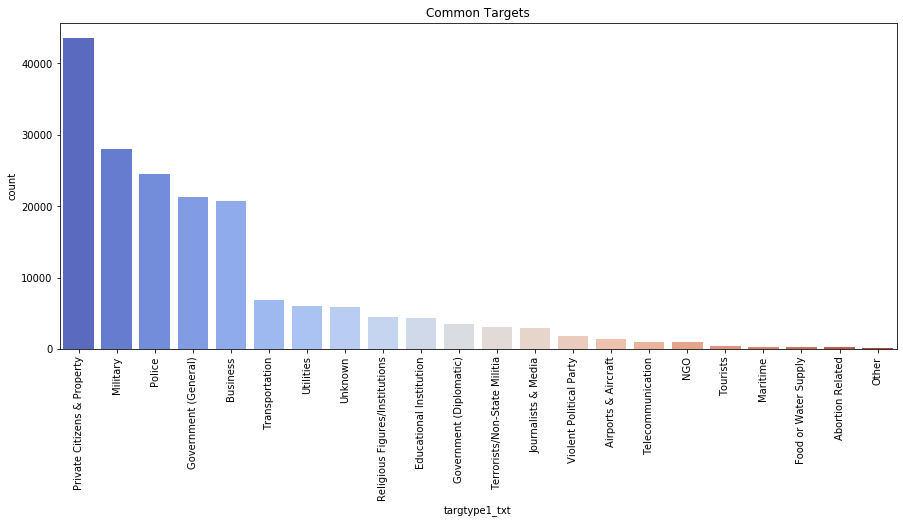

In [8]:
plt.subplots(figsize=(15,6))
snr.countplot(x='targtype1_txt', data=newdata, palette= 'coolwarm', order=newdata['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Common Targets')

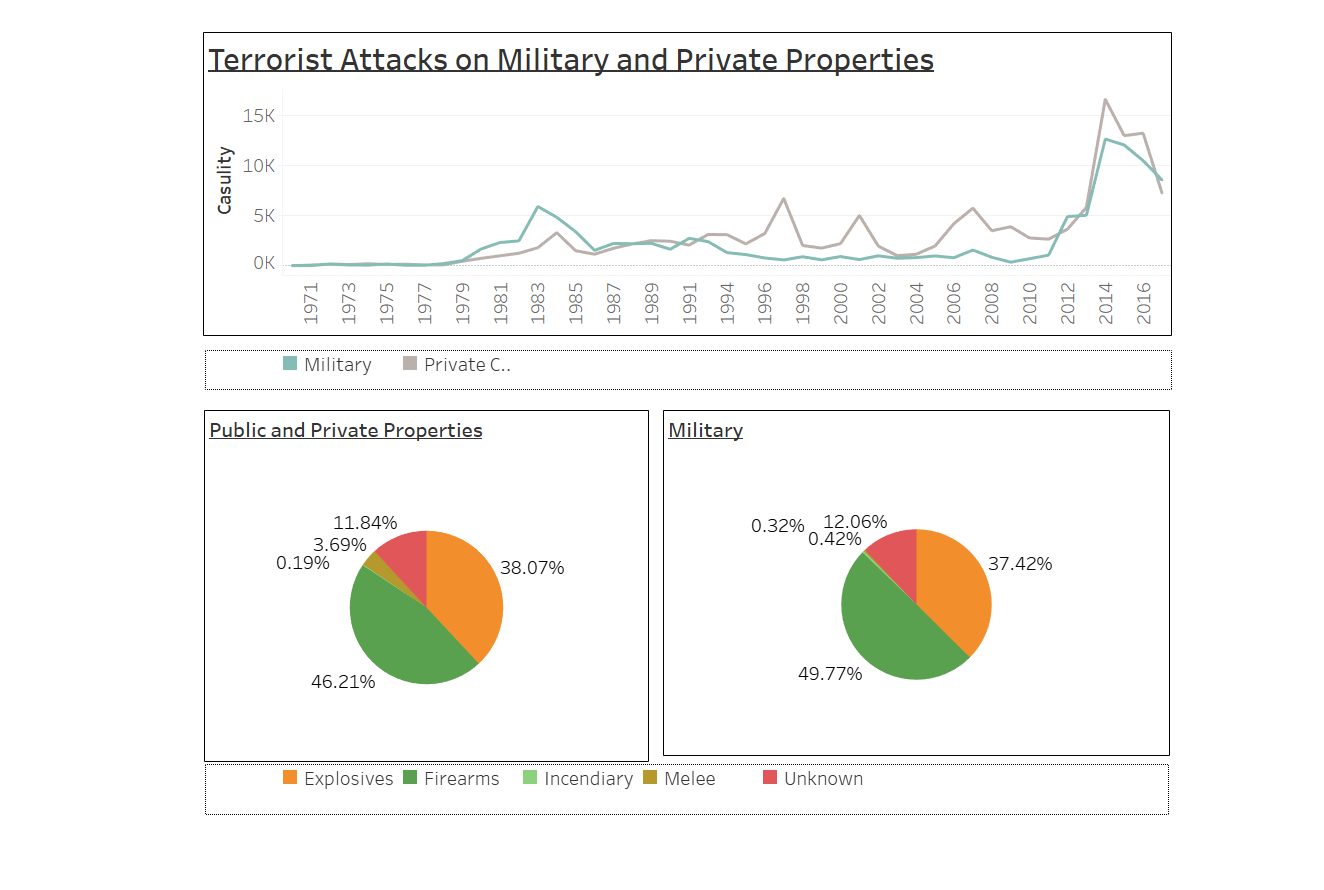

In [31]:
Image('./Frequent target Summary.png')

Military convoys and Private and Personal proporties are the most common targets for terrorism organizations. We can see from the above tableau dashboard after 2010, attacks on military have incresed rapidly. Also as expected, most of the attacks are carries out with the help of explosives and firearms. 

#Attacks by region

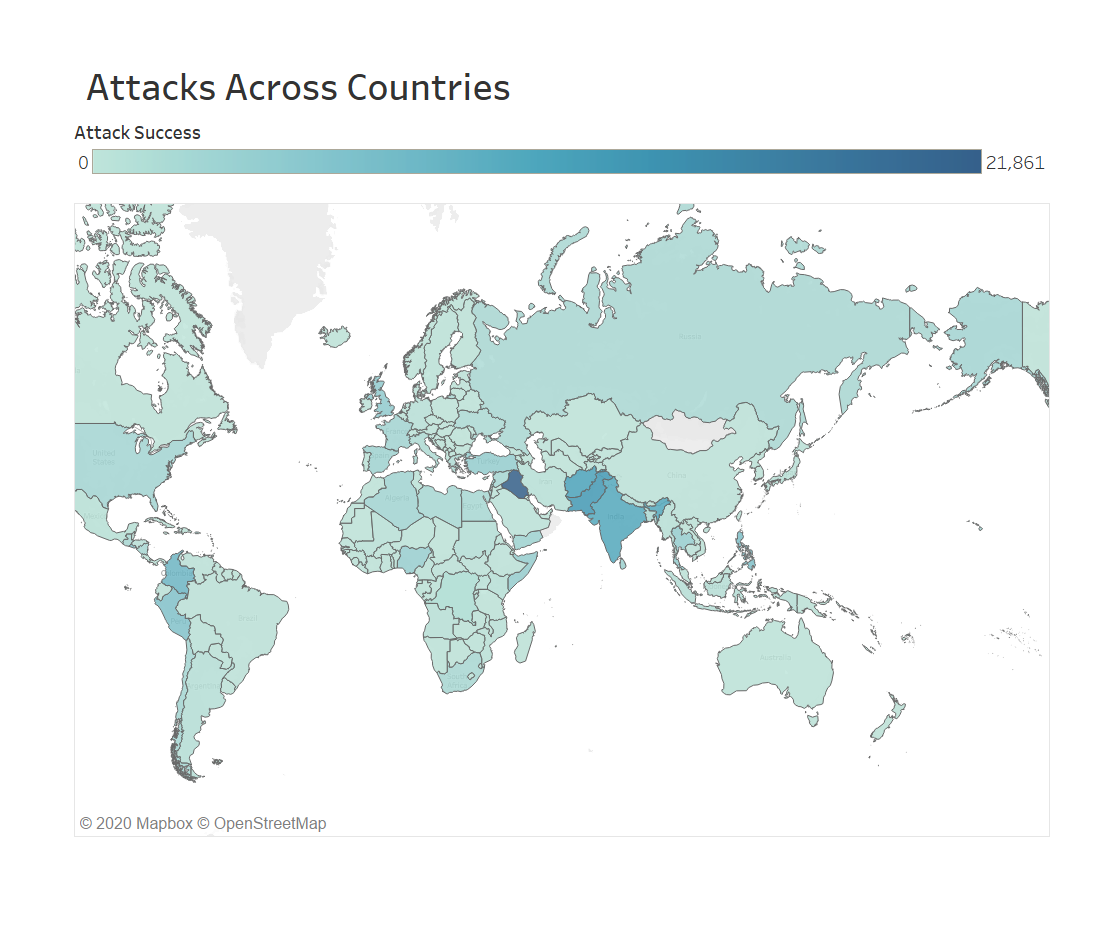

In [19]:
from IPython.display import Image
Image('./Successful_attacks.png')

In [12]:
#lets find successful attacks by Region
#created new dataframe containing information where success is 1
data=newdata.loc[newdata['success']==1]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

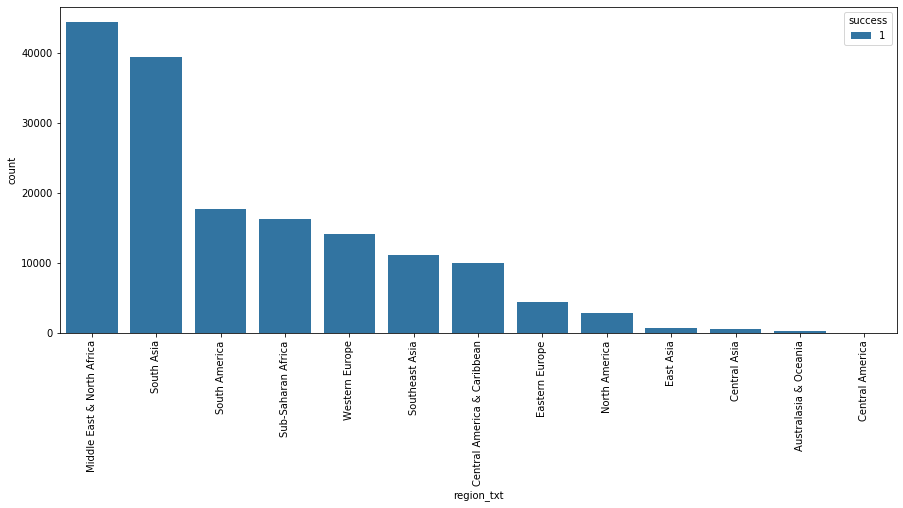

In [28]:
plt.subplots(figsize=(15,6))
snr.countplot(x='region_txt',data=data, order=data['region_txt'].value_counts().index, hue='success')
plt.xticks(rotation=90)

Middle East and North Africa witness highest amount of terrorist attacks. As number of people affected are highest in this region. This region is followed by South Asia and South America respectively. However, we can see from the above graphs that, number of terrorist attacks casulities in the North America, East Asia and Central Asia are far less than the other geographic region. 

# Top Terror Organizations

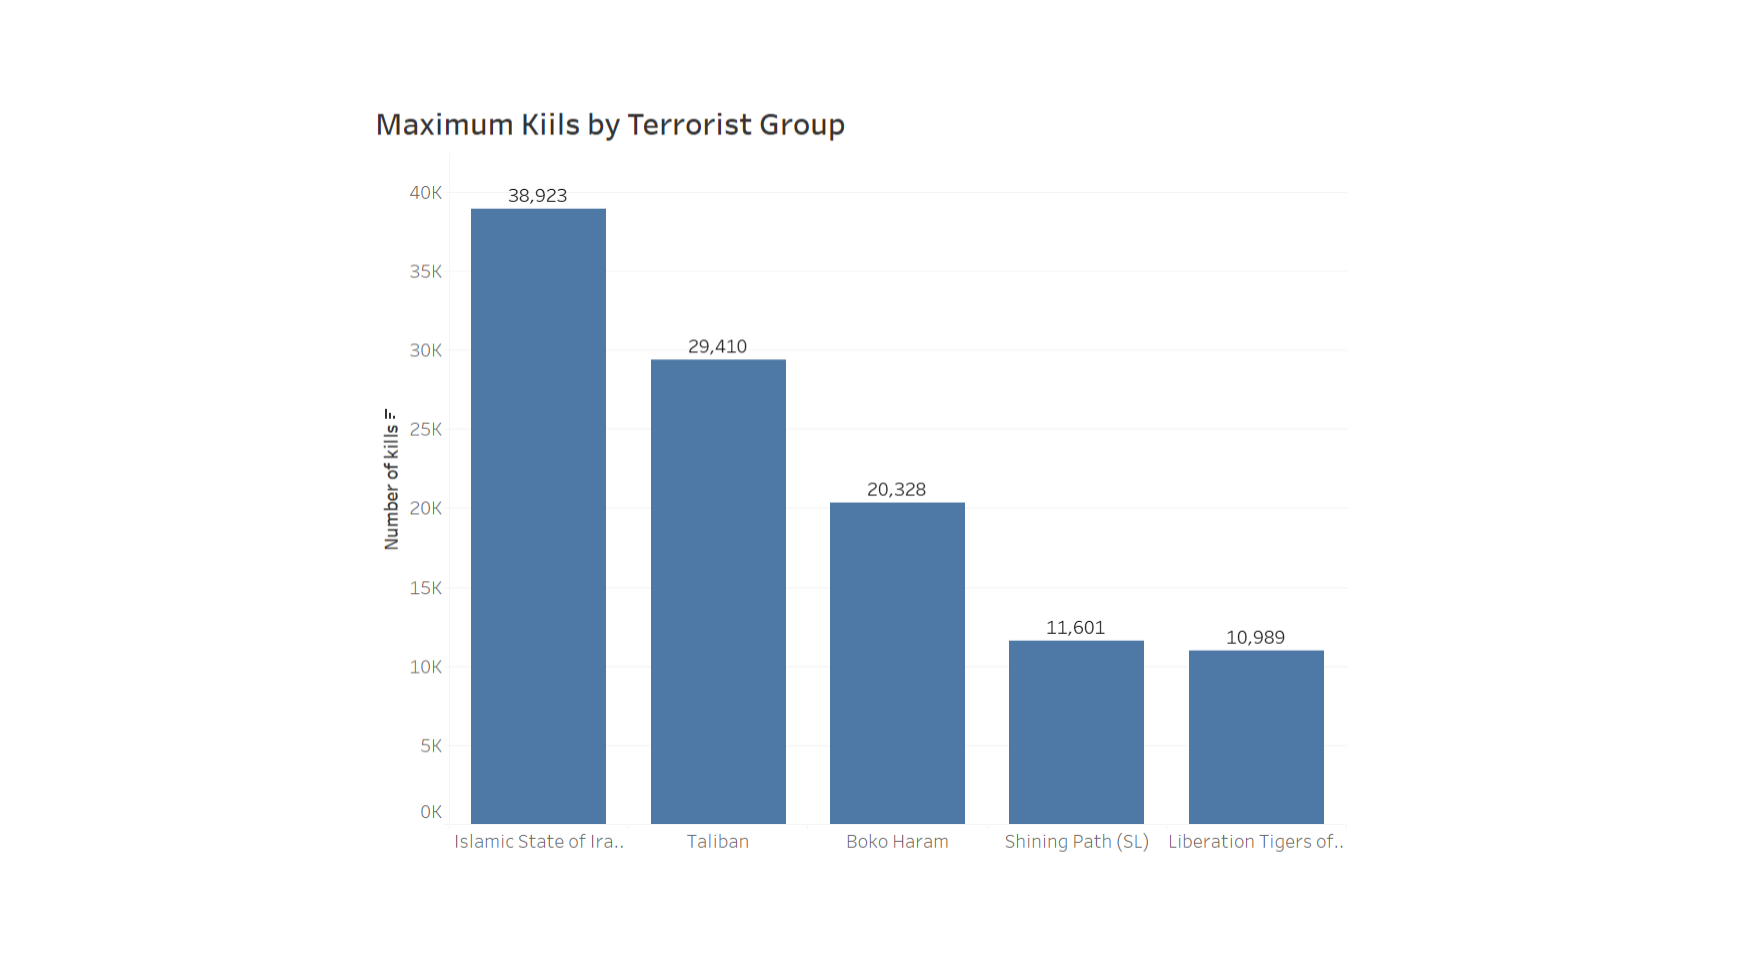

In [32]:
Image('./Terror_kills.png')

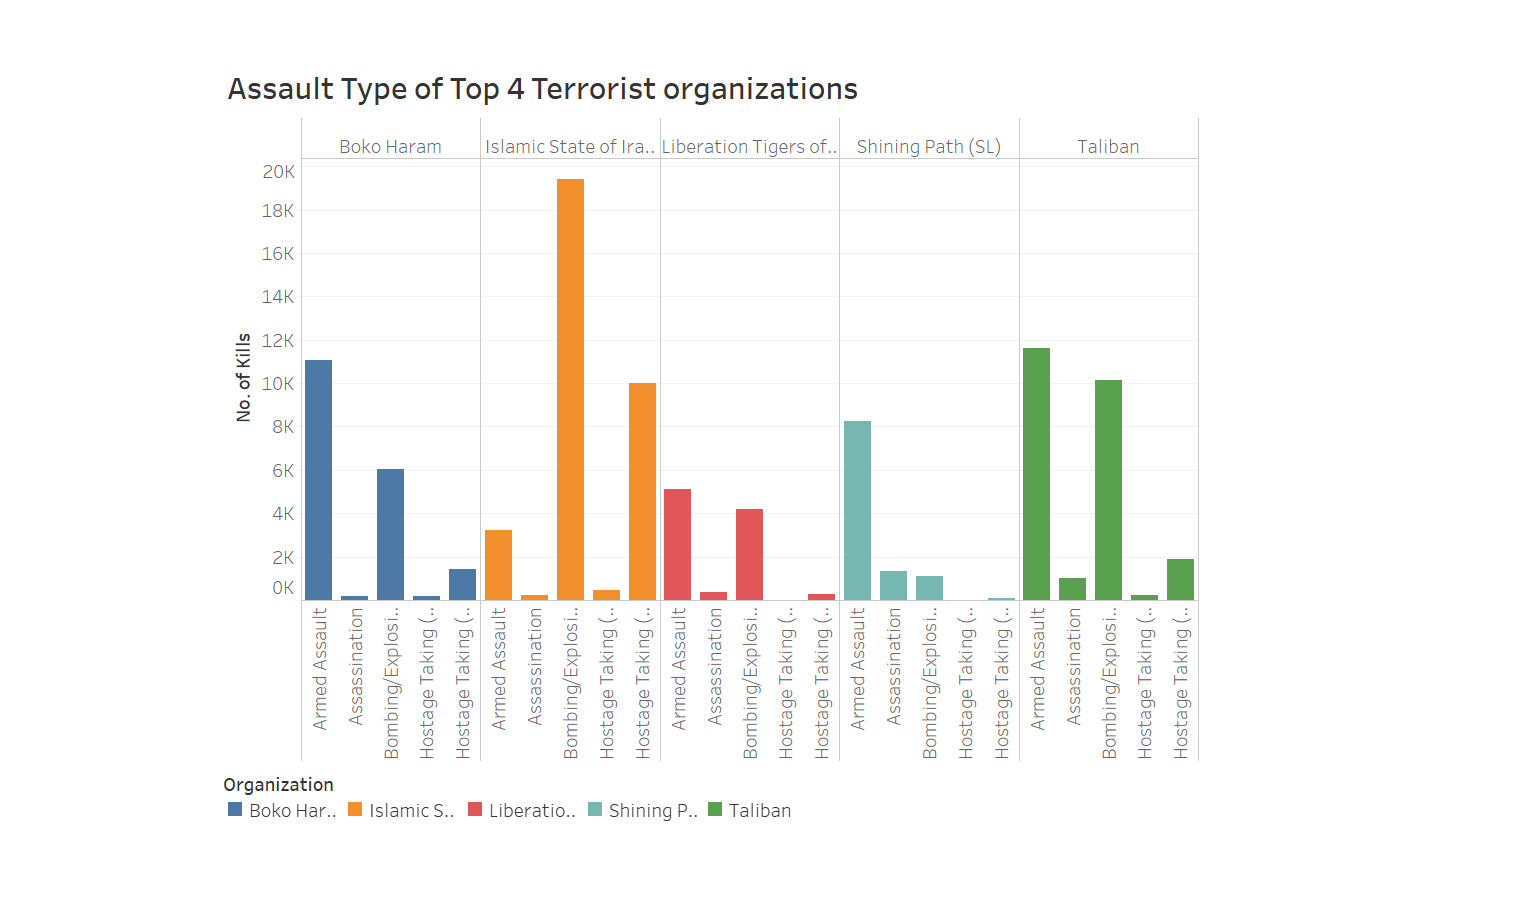

In [34]:
Image('./Assault_type.png')

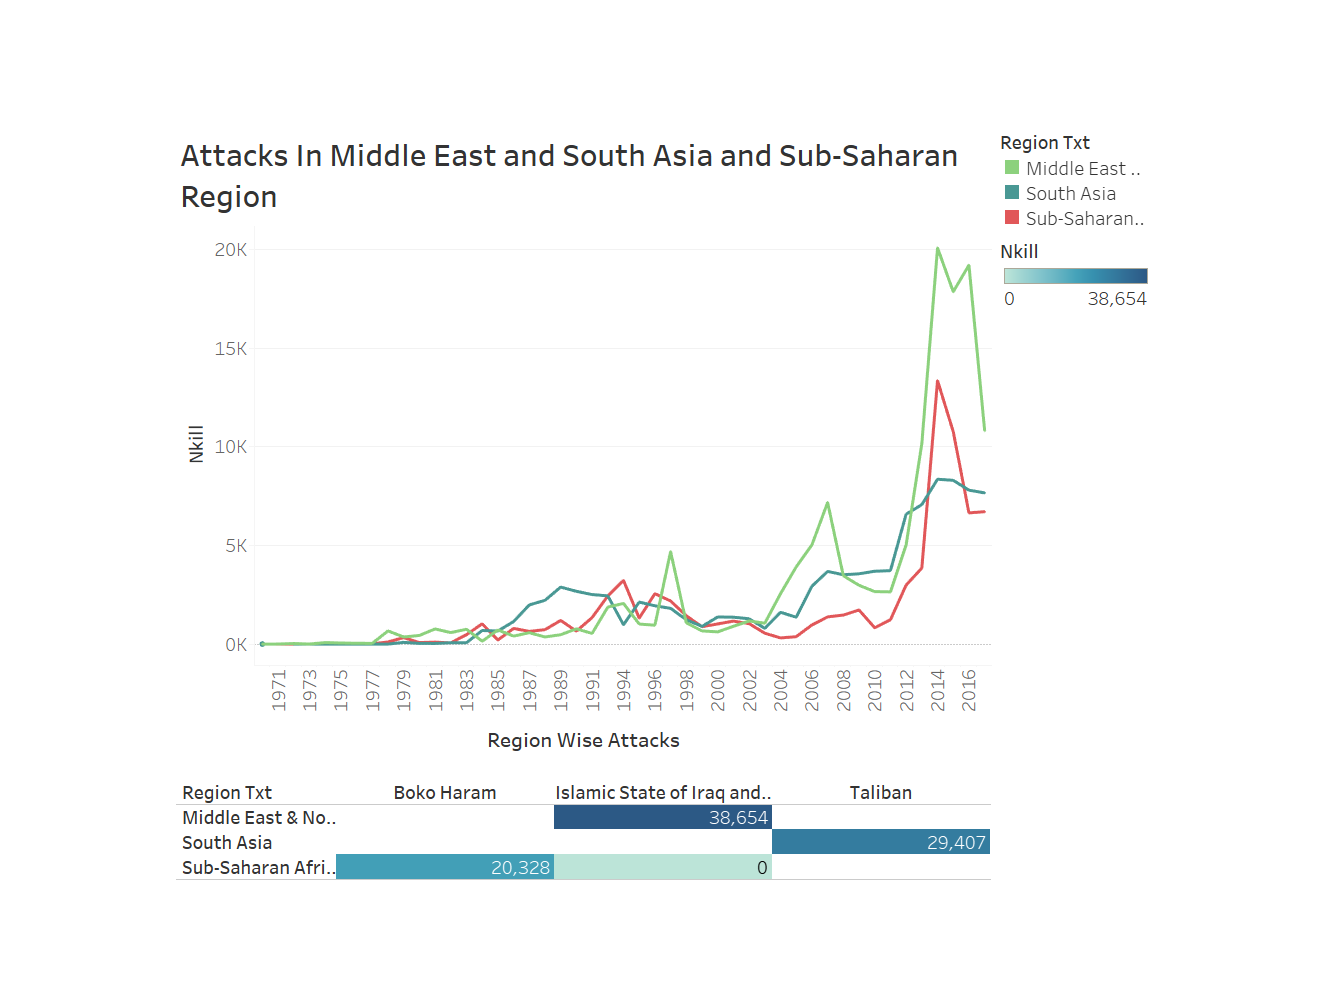

In [35]:
Image('./Top Terror Groups.png')

Islamic State is one of the most notorious terrorism organization in the world. This group has caused highest number of causlities with its terror attacks. This organization behind most of terror attacks in middle east and North African region. We can observed that, post the inception of this organiation in late 2000's number of terror attacks have increased rapidly in Middle East region.Boko haram and Taliban  is active in Sub-Saharan region. However, effects of organized anti-terror efforts are showing results since 2014 and we can see a rapid decline in terror attacks in above mentioned regions. 